In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.battle import create_game
from src.player_info import PlayerInfo

# Simulate a battle royale

In [2]:
# Inspired from the normal distribution
distribution = {
    PlayerInfo.PRO: 1,
    PlayerInfo.V_GOOD: 8,
    PlayerInfo.GOOD: 15,
    PlayerInfo.AVERAGE: 60,
    PlayerInfo.BAD: 16,
}
players, game = create_game(distribution)

## Play the game several times

### Choose N, the number of simulations


In [3]:
N = 10_000

In [4]:
for _ in range(N):
    game.initialize()
    game.play_game()
    

Text(0.5, 1.0, 'Ranking')

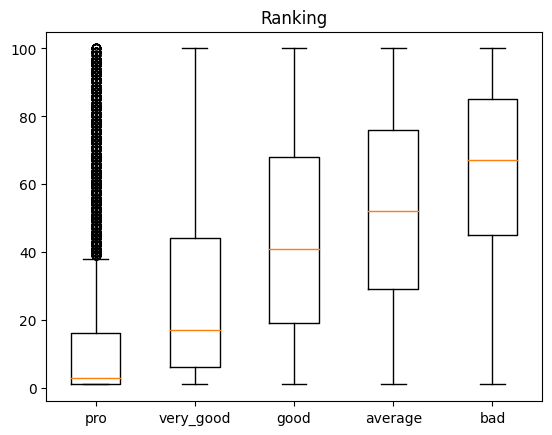

In [5]:
ranks = {}
for p in players:
    if p.category in ranks:
        ranks[p.category] += p.ranks
    else:
        ranks[p.category] = p.ranks
        
fig, ax = plt.subplots()
ax.boxplot(ranks.values())
ax.set_xticklabels(ranks.keys())
ax.set_title("Ranking")

In [6]:
def plot_bars(attr):
    gross = {}
    for p in players:
        if p.category in gross:
            gross[p.category] += getattr(p, attr)
        else:
            gross[p.category] = getattr(p, attr)

    average = {}
    for cat in gross:
        cat_enum = PlayerInfo.get_cat_enum(cat)
        average[cat] = round(gross[cat] / (N * distribution[cat_enum]), 2)

    fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
    bars = ax[0].bar(gross.keys(), gross.values())
    ax[0].bar_label(bars)
    ax[0].set_title(attr)
    
    bars = ax[1].bar(average.keys(), average.values())
    ax[1].bar_label(bars)
    ax[1].set_title(f"{attr} average per player ({N} games)")



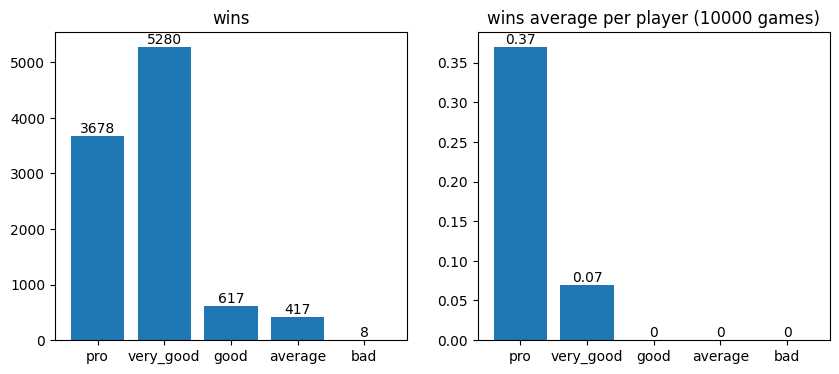

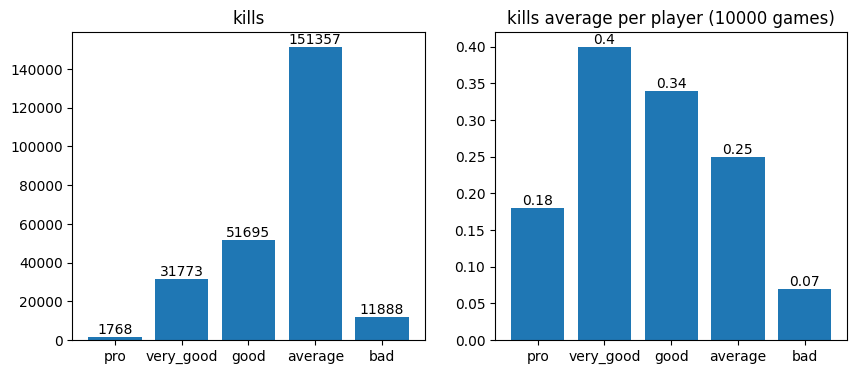

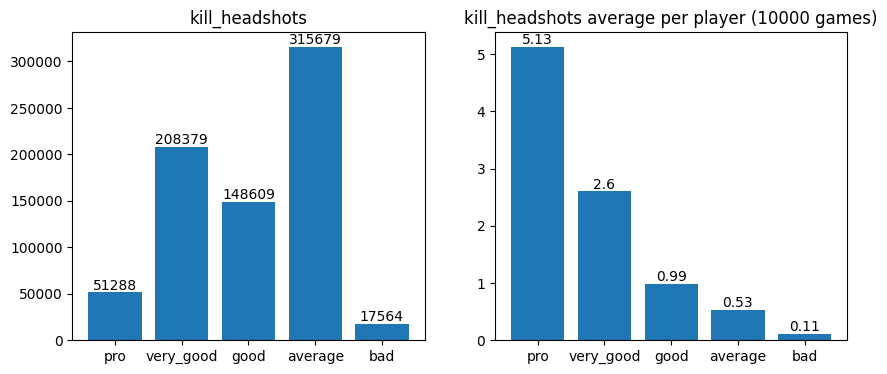

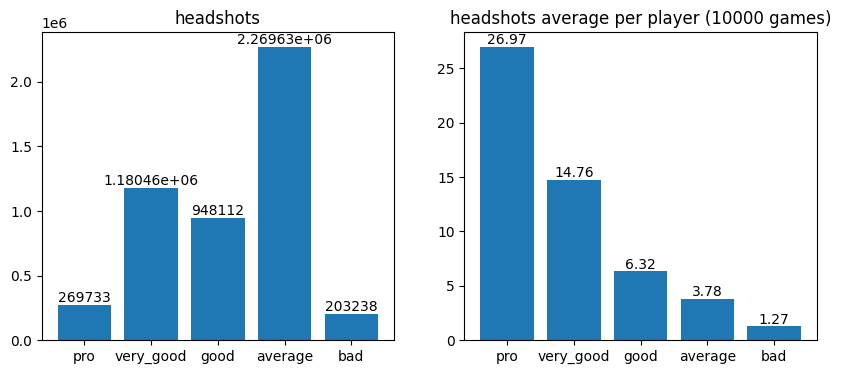

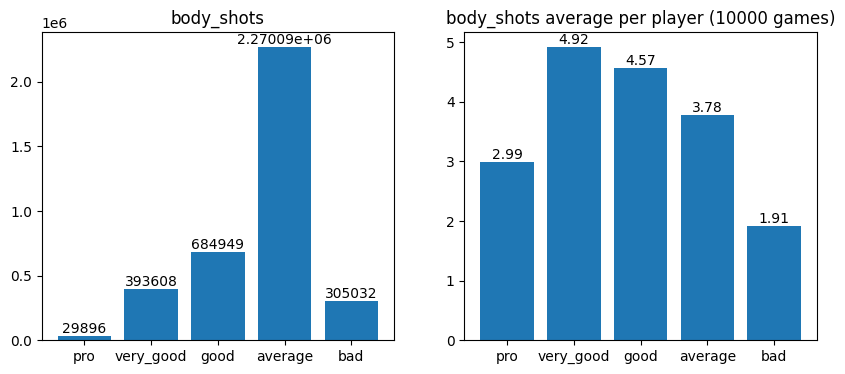

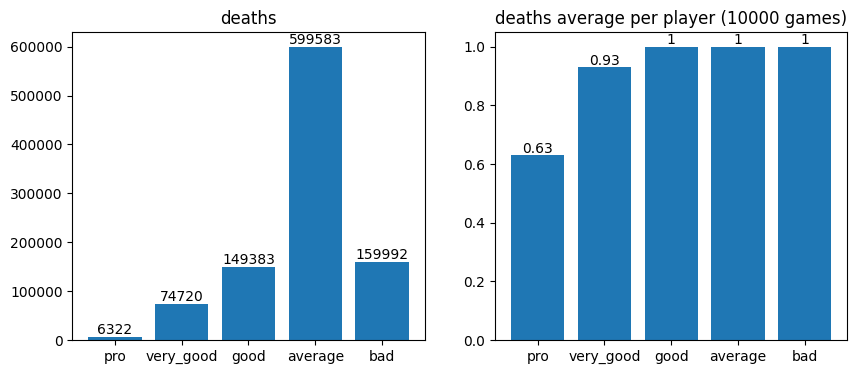

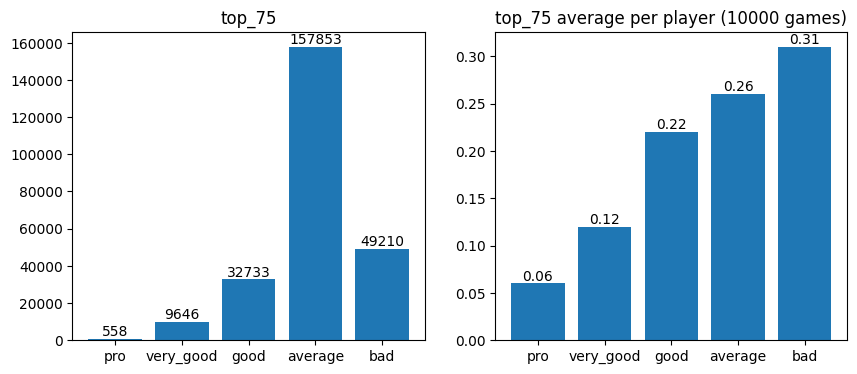

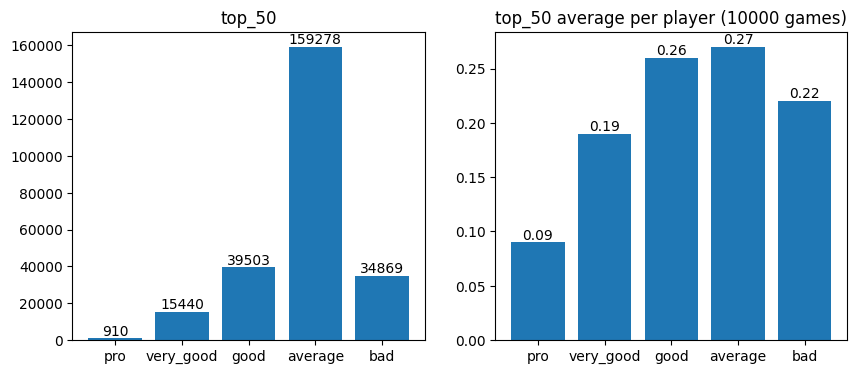

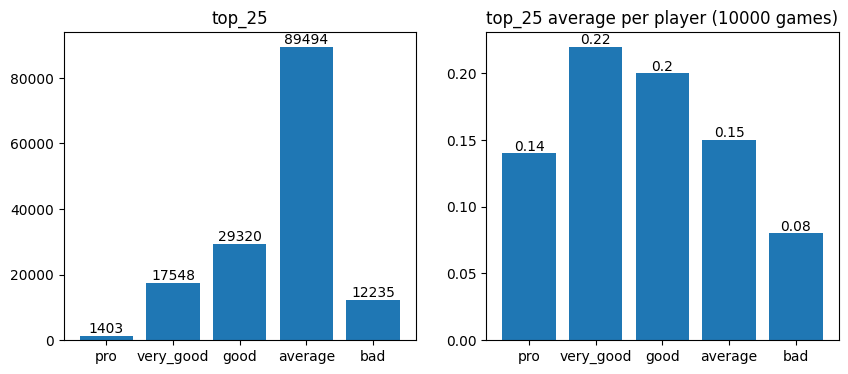

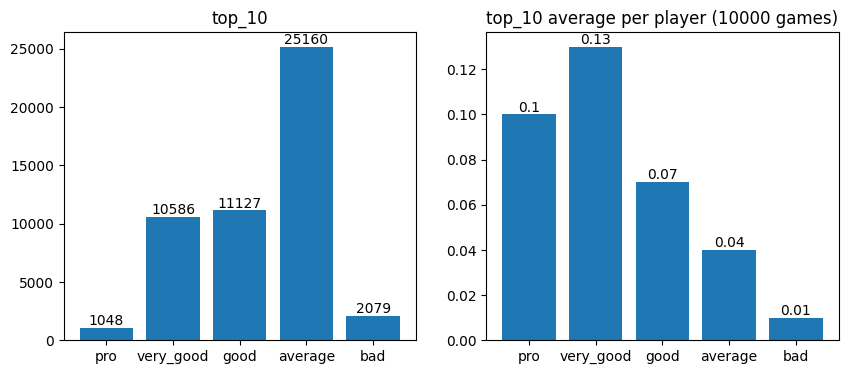

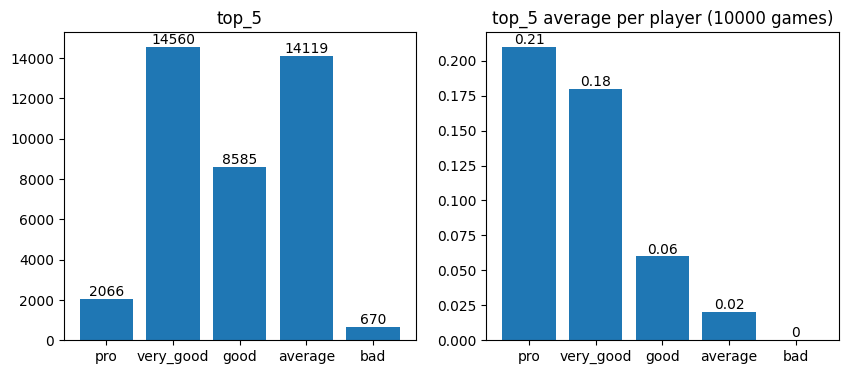

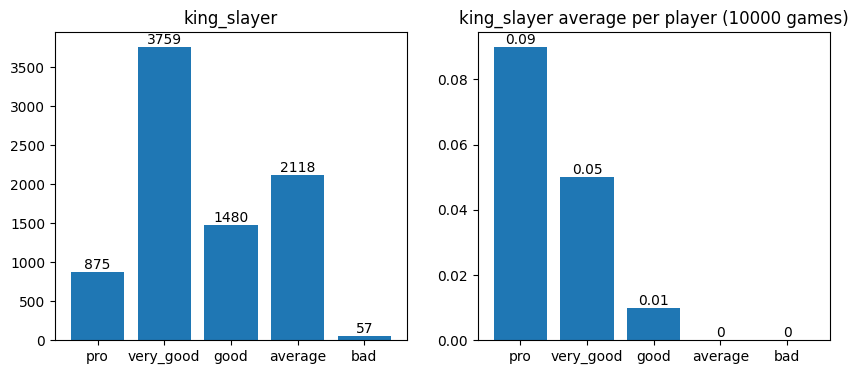

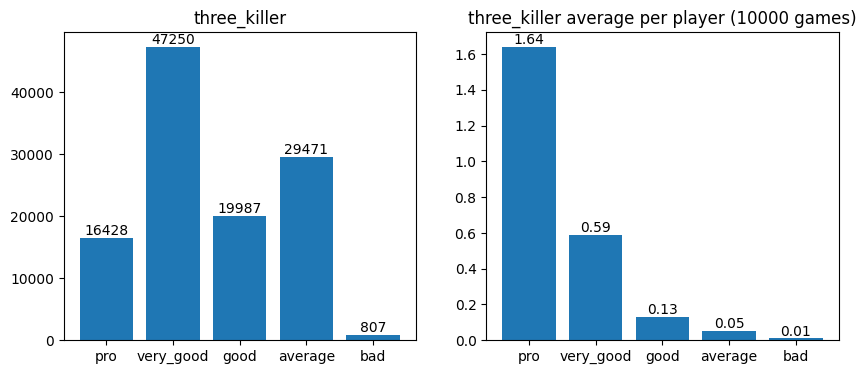

In [7]:
plot_bars("wins")
plot_bars("kills")
plot_bars("kill_headshots")
plot_bars("headshots")
plot_bars("body_shots")
plot_bars("deaths")
plot_bars("top_75")
plot_bars("top_50")
plot_bars("top_25")
plot_bars("top_10")
plot_bars("top_5")
plot_bars("king_slayer")
plot_bars("three_killer")

## How much time did each player play?

In this simulation we suppose that an encounter between 2 players happen every 15 seconds. In that encounter, one player survives and the other dies. The worst player survives 30 seconds. The winner of the game survives for 25 minutes.

In [8]:
ranks_avg = {}
for k, v in ranks.items():   
    ranks_avg[k] = np.average(v)
ranks_avg

{'pro': 13.8745,
 'very_good': 27.64225,
 'good': 44.275686666666665,
 'average': 52.306325,
 'bad': 63.27954375}

In [9]:
# Game time in minutes
game_times = {}
for k, v in ranks_avg.items():
    game_times[k] = (101 - v) / 4
game_times

{'pro': 21.781375,
 'very_good': 18.3394375,
 'good': 14.181078333333334,
 'average': 12.17341875,
 'bad': 9.4301140625}

Text(0.5, 1.0, 'Game time average')

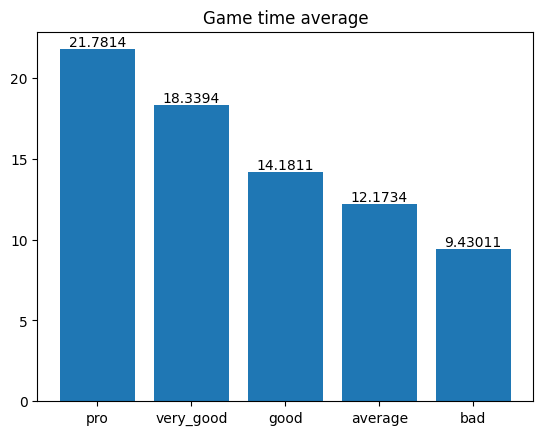

In [10]:
fig, ax = plt.subplots()
bars = ax.bar(game_times.keys(), game_times.values())
ax.bar_label(bars)
ax.set_title("Game time average")

